In [ ]:
import sys
import subprocess

try:
    import cv2
    print("OpenCV is already installed.")
except ImportError:
    print("Installing OpenCV...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "opencv-python"])
    print("OpenCV installed successfully.")
    
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "numpy"])
print("Setup complete. You can now run the rest of the code.")

OpenCV is already installed.
Setup complete. You can now run the rest of the code.


In [3]:
from IPython import get_ipython
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import os

Loaded image: 1.png
Loaded image: 2.png
Loaded image: 3.png

Processing image: 1.png


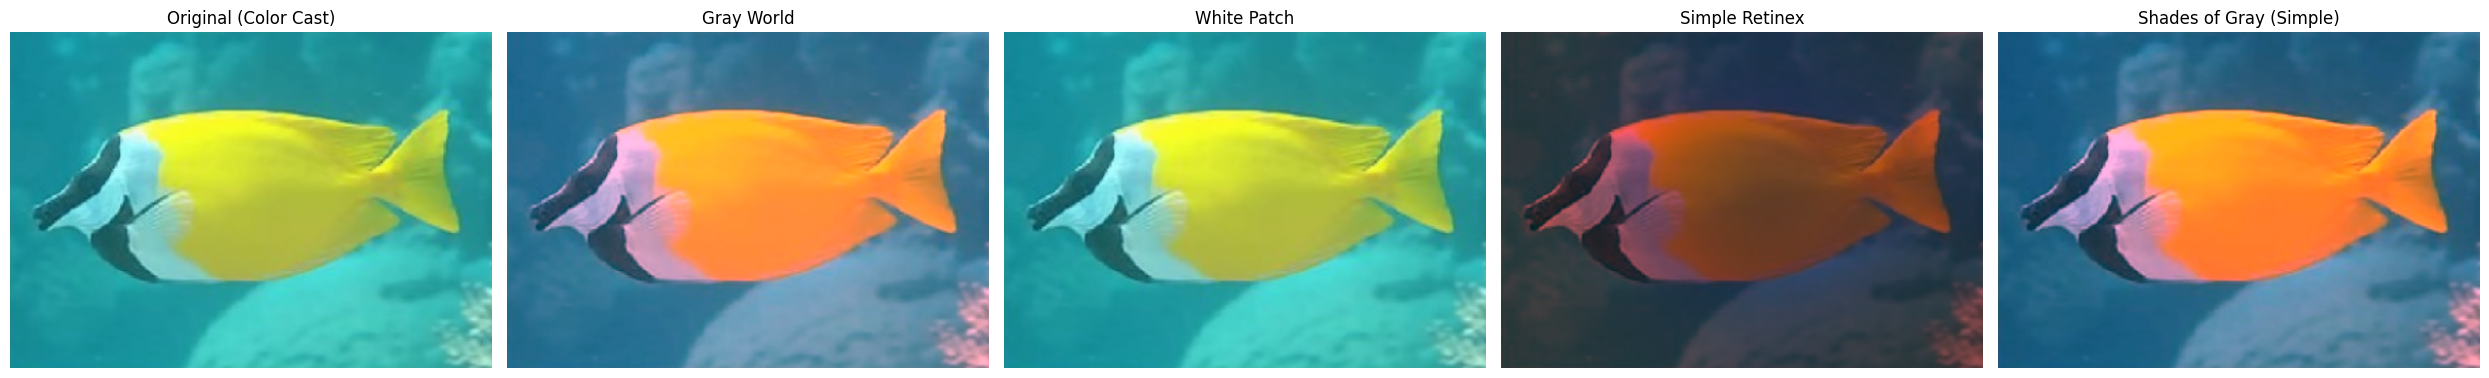


Processing image: 2.png


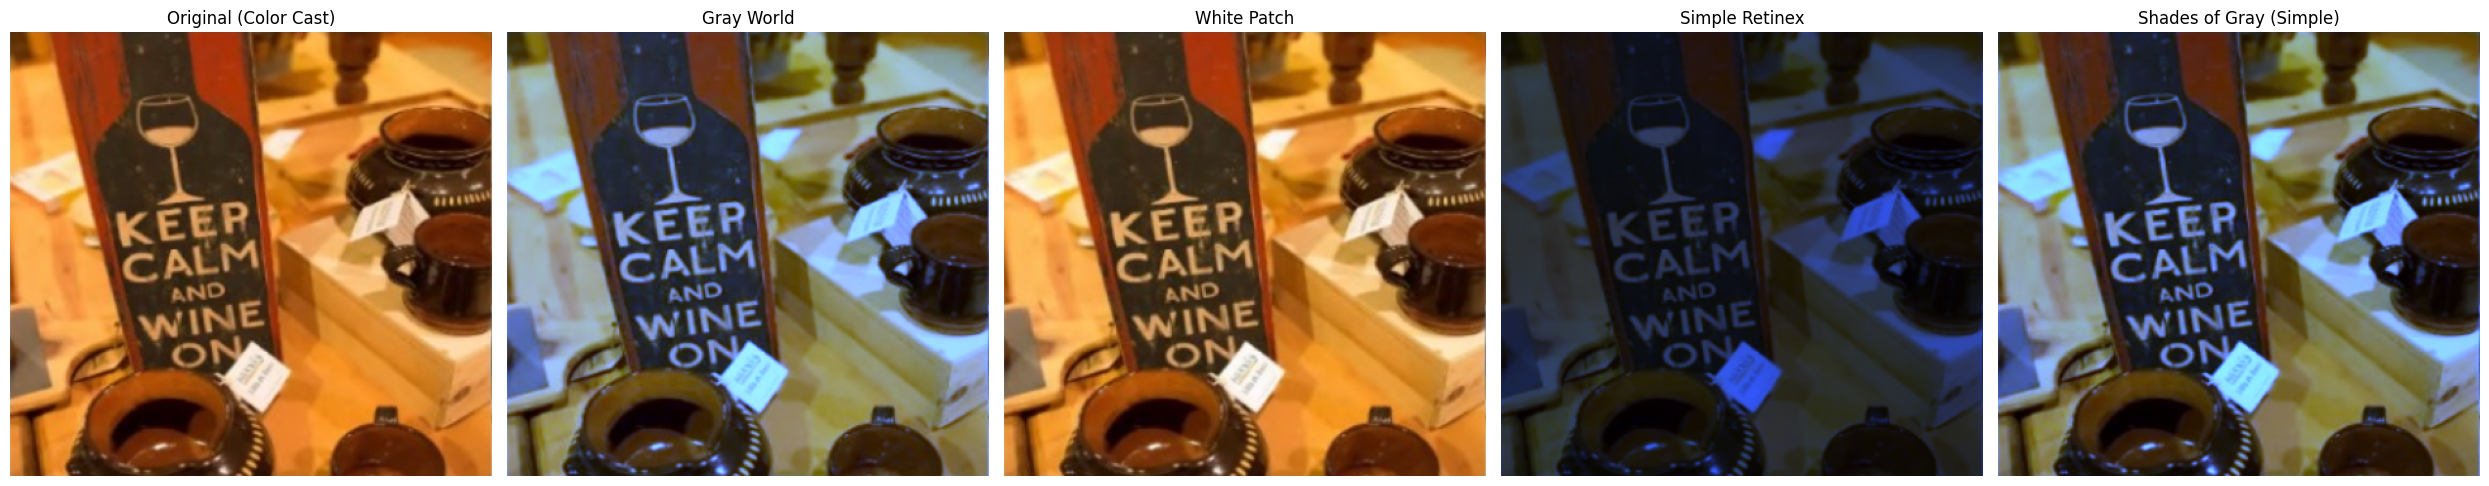


Processing image: 3.png


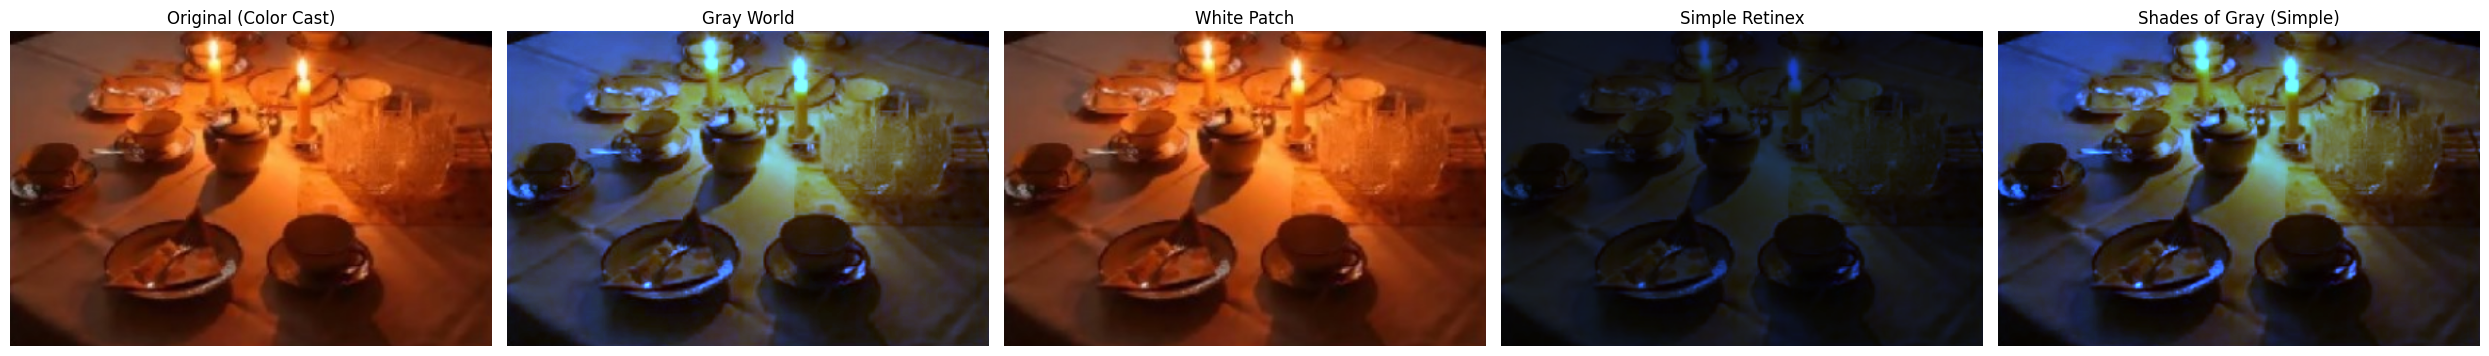

In [4]:
# Algoritma 1: Gray World Assumption
def gray_world(img):
    img = img.astype(np.float32)

    avg_b = np.mean(img[:, :, 0])
    avg_g = np.mean(img[:, :, 1])
    avg_r = np.mean(img[:, :, 2])
    avg_gray = (avg_b + avg_g + avg_r) / 3.0

    scale_b = avg_gray / avg_b
    scale_g = avg_gray / avg_g
    scale_r = avg_gray / avg_r

    result = img.copy()
    result[:, :, 0] *= scale_b
    result[:, :, 1] *= scale_g
    result[:, :, 2] *= scale_r

    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

# Algoritma 2: White Patch (Max-RGB)
def white_patch(img):
    img = img.astype(np.float32)

    max_r = np.max(img[:, :, 2])
    max_g = np.max(img[:, :, 1])
    max_b = np.max(img[:, :, 0])

    scale_r = 255.0 / max_r
    scale_g = 255.0 / max_g
    scale_b = 255.0 / max_b

    result = img.copy()
    result[:, :, 2] *= scale_r
    result[:, :, 1] *= scale_g
    result[:, :, 0] *= scale_b

    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

# Algoritma 3: Simple Retinex (Single Scale)
def simple_retinex(img):
    img = img.astype(np.float32) + 1.0

    log_r = np.log(img[:, :, 2])
    log_g = np.log(img[:, :, 1])
    log_b = np.log(img[:, :, 0])

    sigma = 80
    r_blur = cv2.GaussianBlur(log_r, (0, 0), sigma)
    g_blur = cv2.GaussianBlur(log_g, (0, 0), sigma)
    b_blur = cv2.GaussianBlur(log_b, (0, 0), sigma)

    reflectance_r = log_r - r_blur
    reflectance_g = log_g - g_blur
    reflectance_b = log_b - b_blur

    result_r = np.exp(reflectance_r)
    result_g = np.exp(reflectance_g)
    result_b = np.exp(reflectance_b)

    result = np.stack([result_b, result_g, result_r], axis=2)

    result = np.clip(result * 255 / np.max(result), 0, 255).astype(np.uint8)

    return result

# Algoritma 4: Shades of Gray (PowerLaw)
def shades_of_gray_simple(img, p=1.0):
    gw_img = gray_world(img)

    gw_img = gw_img.astype(np.float32) / 255.0
    result = np.power(gw_img, p)
    result = np.clip(result * 255, 0, 255).astype(np.uint8)

    return result

def plot_comparison(original, grayworld, whitepatch, retinex, shadesofgray):
    fig, axs = plt.subplots(1, 5, figsize=(25, 6))
    axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original (Color Cast)")

    axs[1].imshow(cv2.cvtColor(grayworld, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Gray World")

    axs[2].imshow(cv2.cvtColor(whitepatch, cv2.COLOR_BGR2RGB))
    axs[2].set_title("White Patch")

    axs[3].imshow(cv2.cvtColor(retinex, cv2.COLOR_BGR2RGB))
    axs[3].set_title("Simple Retinex")

    axs[4].imshow(cv2.cvtColor(shadesofgray, cv2.COLOR_BGR2RGB))
    axs[4].set_title("Shades of Gray (Simple)")


    for ax in axs:
        ax.axis("off")
    plt.tight_layout()
    plt.show()

def load_images_from_folder():
    image_folder = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'images')
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))]
    
    images = []
    for filename in sorted(image_files):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append((filename, img))
            print(f"Loaded image: {filename}")
    
    return images

images = load_images_from_folder()

if images:
    for filename, img in images:
        print(f"\nProcessing image: {filename}")
        
        grayworld_img = gray_world(img)
        whitepatch_img = white_patch(img)
        retinex_img = simple_retinex(img)
        shadesofgray_img = shades_of_gray_simple(img, p=1.2)
        
        plot_comparison(img, grayworld_img, whitepatch_img, retinex_img, shadesofgray_img)
else:
    print("No images found in the 'images' folder.")